# Exercise 14: Mediation

1. Simulating data 3/3
2. Visualizing data 2/2
3. Mediation Analysis 4/4
4. Reflection 1/1

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form:
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally:

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms.

In [ ]:
sample_size = 100 # How many children in data set?
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0.
sd_c = 85      # standard dev of gaussian noise term, epsilon_c


simulate_data <- function(sample_size, age_lo, age_hi, beta_xa,
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
age <- runif(sample_size, age_lo, age_hi)
epsilon_x <- rnorm(sample_size, mean = 0, sd = sd_x)
x <- beta_xa * age + beta_x0 + epsilon_x
epsilon_c <- rnorm (sample_size, mean = 0, sd =  sd_c)
c <- beta_ca * age + beta_cx * x + beta_c0 + epsilon_c
data.frame(age = age, x = x, c = c)
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,114.16869,42.53447,-3.550831
2,186.59487,89.56810,390.263631
3,104.68390,37.40500,-7.702245
4,92.79249,62.24548,261.536322
5,110.86780,110.69297,298.494987
6,161.06793,174.02191,665.420838


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


a) Plot the relationship between age and reading comprehension.

`geom_smooth()` using formula = 'y ~ x'


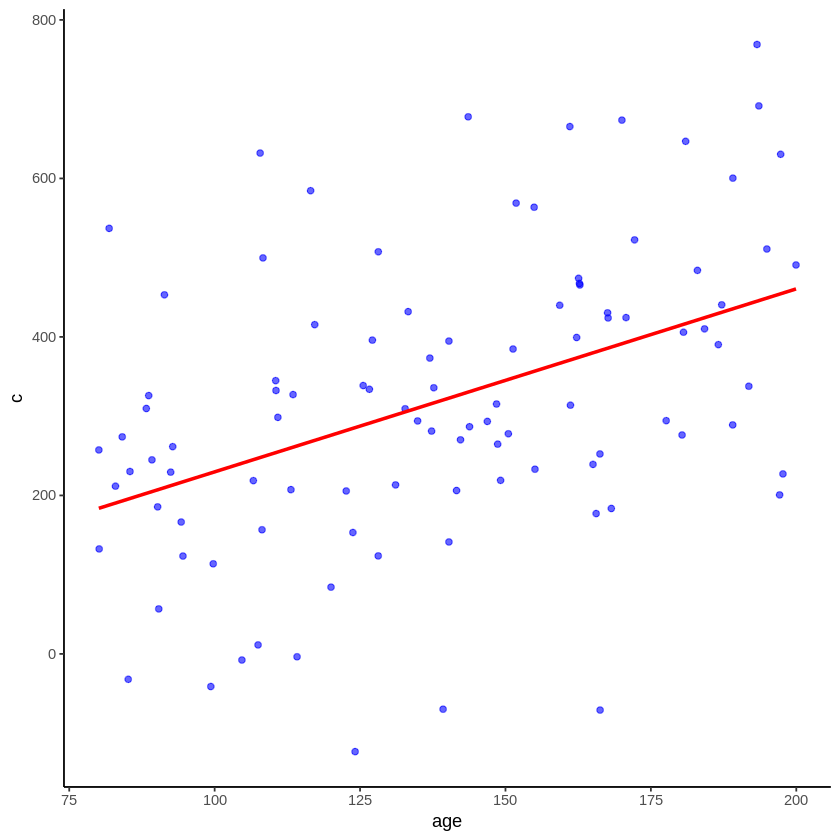

In [ ]:
ggplot(dat, aes(x=age, y = c)) +
geom_point(color = "blue", alpha = 0.6)+
geom_smooth(method = "lm", color = "red", se = FALSE) +
theme_classic()


b) Plot the relationship between reading experience, age, and reading comprehension.

`geom_smooth()` using formula = 'y ~ x'


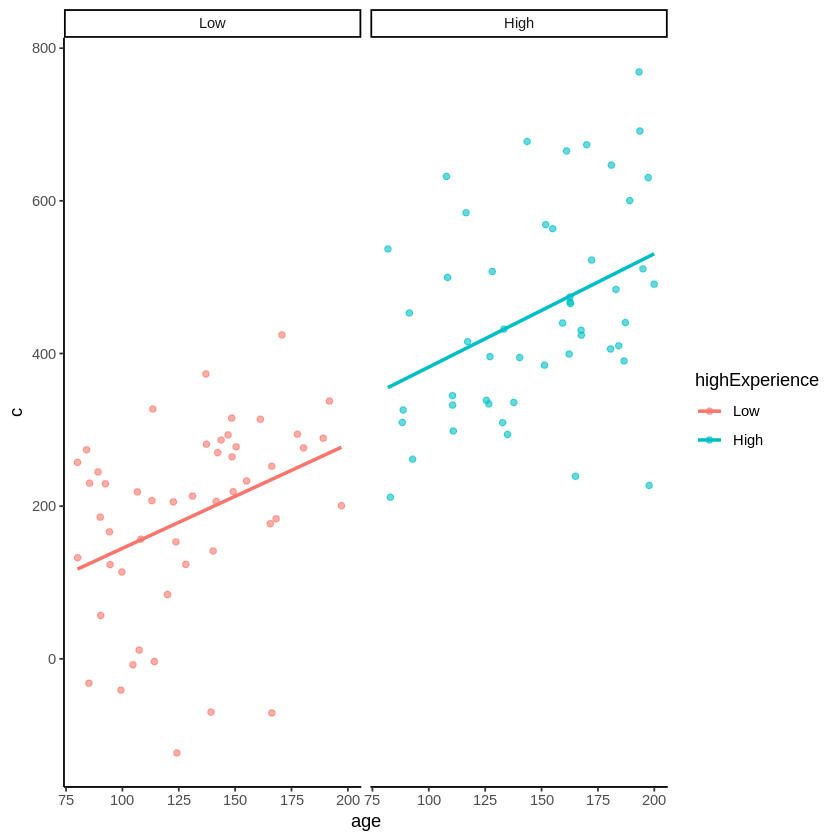

In [ ]:
med_x <- median(dat$x)
dat <- dat %>%
  mutate(highExperience = factor(ifelse(x< med_x, "Low", "High"), levels = c ("Low", "High")))

ggplot(dat, aes(x=age, y = c, color = highExperience)) +
geom_point(alpha = 0.6)+
geom_smooth(method = "lm", se = FALSE) +
facet_grid(.~ highExperience)+
theme_classic()




---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [ ]:
install.packages("mediation")
library(mediation)
library(MASS)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘checkmate’, ‘Rdpack’, ‘zoo’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘mvtnorm’, ‘sandwich’, ‘lpSolve’, ‘Hmisc’, ‘lme4’


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [ ]:
fitM <- lm( x ~ age, data= dat)
fitY <- lm( c ~ x + age, data= dat)
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="age", mediator="x", boot = TRUE, sims = 1000)
summary(fitMed)


Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-120.259  -27.963   -5.104   30.918  125.156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   9.4453    20.5148   0.460  0.64624   
age           0.3926     0.1434   2.737  0.00736 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.88 on 98 degrees of freedom
Multiple R-squared:  0.07103,	Adjusted R-squared:  0.06155 
F-statistic: 7.493 on 1 and 98 DF,  p-value: 0.007355



Call:
lm(formula = c ~ x + age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-230.39  -29.26    5.50   52.01  130.09 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -29.8566    30.5826  -0.976    0.331    
x             3.0351     0.1504  20.177  < 2e-16 ***
age           1.1176     0.2216   5.044 2.13e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74.28 on 97 degrees of freedom
Multiple R-squared:  0.8438,	Adjusted R-squared:  0.8406 
F-statistic:   262 on 2 and 97 DF,  p-value: < 2.2e-16


Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.192        0.347         2.04   0.008 ** 
ADE               1.118        0.693         1.56  <2e-16 ***
Total Effect      2.309        1.375         3.24  <2e-16 ***
Prop. Mediated    0.516        0.235         0.69   0.008 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?


*   In model 1, we can evidence that word reading experience and age are significantly associated. One unit increase in age leads to a small increase in word reading experience. However, as reported by R2 can only explain ~7% of variance.

*  In model 2, we observed that the relation between word reading experience and age to predict reading comprehension is significant. When you have word experience experience this will boost your reading comprehension. Moreover, as we age people is prone to have better reading comprehension independently of their reading experience. The model explains 84% of the variance, which mean both are relevant predictor of reading comprehension.





>

**DUE:** 5pm EST, April 1, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*